In [132]:
from pathlib import Path
import os
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import pandas as pd

# Set Dose

In [133]:
# Change by your own output folder 
output_folder = Path('./output')

# Read mhd/raw file: dose, dose squared
dose_img = os.path.join(output_folder, 'run01-Dose.mhd')
squared_img = os.path.join(output_folder, 'run01-Dose-Squared.mhd')

# Change to array
dose_array = sitk.GetArrayFromImage(sitk.ReadImage(dose_img))
squared_array = sitk.GetArrayFromImage(sitk.ReadImage(squared_img))

# Set Dose Z

In [134]:
# x: 210 mm, y: 210 mm, z: 210 mm, voxel: 10 mm
num_voxel = 21

# Get value of Square Dose Z
# Get value of dose Z
dose_z = []
for i in range(num_voxel):
    temp_dose = dose_array[num_voxel-i-1, 10, 10]
    dose_z.append(temp_dose)
    
# Set position
poi = np.linspace(10, 210, 21)

# Set Table to show all value
# revese Index
data ={
    "z (mm)": poi,
    "Dose (Gy)": dose_z[num_voxel:None:-1] ,
}

df = pd.DataFrame(data)
display(df)
df.to_excel("Data_Dose_Z.xlsx", index=False)

,z (mm),Dose (Gy)
0,10.0,1.050213e-09
1,20.0,1.225313e-09
2,30.0,8.854090e-10
3,40.0,1.309173e-09
4,50.0,5.814919e-10
5,60.0,1.628901e-09
6,70.0,2.009009e-09
7,80.0,1.128754e-09
8,90.0,1.687101e-09
9,100.0,1.247051e-09


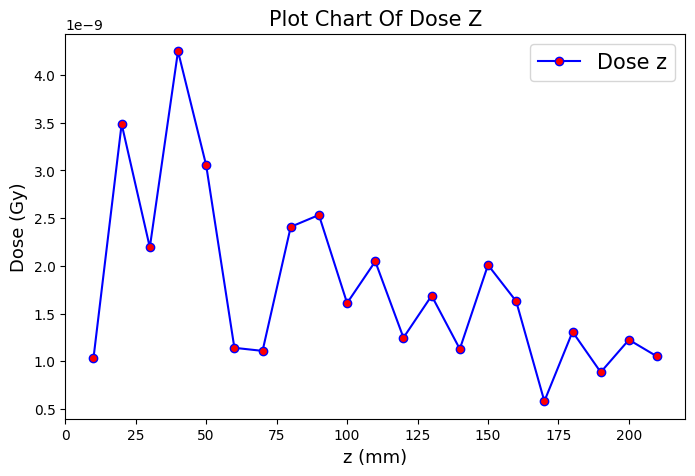

In [135]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(poi, dose_z, color="blue", marker="o", mfc ="red", label='Dose z')
plt.title("Plot Chart Of Dose Z", fontsize=15)
plt.legend(fontsize=15)
plt.xlabel("z (mm)", fontsize=13)
plt.ylabel("Dose (Gy)", fontsize=13)
plt.savefig("Dose_z.png", dpi=300)

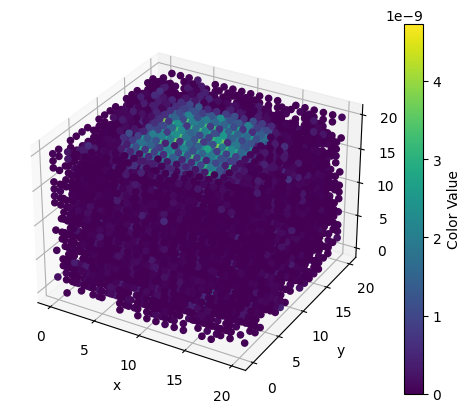

In [136]:
# Display the 3D image
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

z, y, x = dose_array.nonzero()
# Scatter plot
scatter = ax.scatter(x, y, z, c=dose_array[z, x, y], alpha=1)

# Color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Color Value')

plt.xlabel("x")
plt.ylabel("y")
plt.savefig("3DDose_z.png", dpi=300)
plt.show()